In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

In [2]:
#Load data from MNIST with torchvision
train_dataset = torchvision.datasets.MNIST(root='.',
                                          train=True,
                                          transform=transforms.ToTensor(),
                                          download=True)



In [3]:
train_dataset.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [4]:
# the dimensions should be 60000 images of 28x28 dimension
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [5]:
# the targets should be individual labels associated with each image
print(train_dataset.targets)
print(train_dataset.targets.shape)

tensor([5, 0, 4,  ..., 5, 6, 8])
torch.Size([60000])


In [6]:
#use torchvision to create the MNIST test dataset
test_dataset = torchvision.datasets.MNIST(root='.',
                                          train=False,
                                          transform=transforms.ToTensor(),
                                          download=True)

#the dimensions should be a subset of the training dataset
test_dataset.data.shape

torch.Size([10000, 28, 28])

In [7]:
#Build the model:
# Just a sequential neural network that receives each of the 28x28 pixels as input
# and outputs a vector of size 10 (the number of classes)
# Using the ReLU activation function
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 10),
)
# there's no need to explicitly declare the softmax function on the last layer

In [8]:
#use the gpu if it's available with cuda
if torch.cuda.is_available():
    device = torch.device('cuda')
    print('Using GPU')
else:
    device = torch.device('cpu')
    print('Using CPU')

# send model to device
model.to(device)


Using GPU


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [9]:
print(device)

cuda


In [10]:
# define loss as cross entropy loss and optimizer as Adam
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [11]:
# the dataloader is a built in function that generates training batches
# use the pytorch dataloader with a batch size of 128
# the train_loader should always be shuffled in order to avoid spurious correlations due to the order of the elements
# don't shuffle the data from the test_loader, as there's no need to, because we only want to use it to evaluate the performance of the model
batch_size = 128
train_loader = torch.utils.data.DataLoader(train_dataset,
                                        batch_size=batch_size,
                                        shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                        batch_size=batch_size,
                                        shuffle=False)

# the dataloader is a generator that yields a bach on each iteration
# each batch is a pair of tensors containing a set of data objects, and it's respective targets

In [12]:
#main training loop
# due to the sheer size of the training set, a small number of epochs can be used
n_epochs = 10

#now create the train and testing losses
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

#now train the model
for epoch in range(n_epochs):
    train_loss=[]
    #iterate over epochs in train_loader, storing each instance in inputs and targets
    for inputs, targets in train_loader:
        #move the data to the GPU
        inputs, targets = inputs.to(device), targets.to(device)
        #reshape the input using the view function
        inputs = inputs.view(-1, 28*28)
        #zero the gradients
        optimizer.zero_grad()
        #forward pass
        outputs = model(inputs)
        #compute the loss
        loss = criterion(outputs, targets)
        #store the loss in train_loss
        train_loss.append(loss.item())
        #backward pass
        loss.backward()
        #update the weights
        optimizer.step()
    #take the average of the train loss
    train_loss = np.mean(train_loss)
    #store the train loss
    train_losses[epoch] = train_loss

    #now do the same for the testing process
    test_loss = []
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        inputs = inputs.view(-1, 28*28)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss.append(loss.item())
    #take the average of the testing loss
    test_loss = np.mean(test_loss)
    #store the testing loss
    test_losses[epoch] = test_loss
    #print the train and testing loss
    print(f"Epoch: {epoch+1:02} | Train Loss: {train_loss:.3f} | Test Loss: {test_loss:.3f}")
    

Epoch: 01 | Train Loss: 0.411 | Test Loss: 0.221
Epoch: 02 | Train Loss: 0.190 | Test Loss: 0.152
Epoch: 03 | Train Loss: 0.138 | Test Loss: 0.119
Epoch: 04 | Train Loss: 0.108 | Test Loss: 0.110
Epoch: 05 | Train Loss: 0.089 | Test Loss: 0.093
Epoch: 06 | Train Loss: 0.074 | Test Loss: 0.091
Epoch: 07 | Train Loss: 0.062 | Test Loss: 0.087
Epoch: 08 | Train Loss: 0.053 | Test Loss: 0.080
Epoch: 09 | Train Loss: 0.046 | Test Loss: 0.077
Epoch: 10 | Train Loss: 0.039 | Test Loss: 0.075


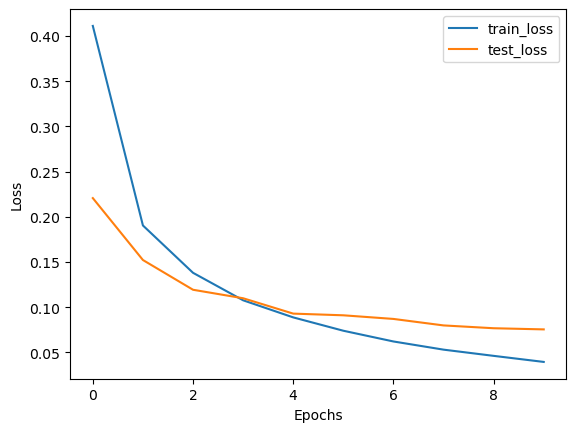

In [13]:
#plot the values for train_losses and test_losses on the same graph
plt.plot(train_losses, label = "train_loss")
plt.plot(test_losses, label = "test_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [17]:
#calculate the accuracy
#initialize the number of correct guesses and the total number of samples as 0
num_correct = 0
num_total = 0
#loop through the data from train_loader, with batches named inputs and targets
for inputs, targets in train_loader:
    #move the data to the gpu
    inputs, targets = inputs.to(device), targets.to(device)
    #reshape the input
    inputs = inputs.view(-1, 28*28)
    #forward pass
    outputs = model(inputs)
    #get the predicted label
    _, predicted = torch.max(outputs.data, 1)
    #calculate the number of correct guesses
    num_correct += (predicted == targets).sum().item()
    #calculate the total number of samples
    num_total += targets.shape[0]
#calculate the accuracy
accuracy = num_correct / num_total
accuracy

0.9916333333333334

In [24]:
#calculate the accuracy of the test set
#calculate the accuracy
#initialize the number of correct guesses and the total number of samples as 0
num_correct = 0
num_total = 0
#loop through the data from train_loader, with batches named inputs and targets
for inputs, targets in test_loader:
    #move the data to the gpu
    inputs, targets = inputs.to(device), targets.to(device)
    #reshape the input
    inputs = inputs.view(-1, 28*28)
    #forward pass
    outputs = model(inputs)
    #get the predicted label
    _, predicted = torch.max(outputs.data, 1)
    #calculate the number of correct guesses
    num_correct += (predicted == targets).sum().item()
    #calculate the total number of samples
    num_total += targets.size(0)
#calculate the accuracy
accuracy = num_correct / num_total
accuracy

0.977

In [32]:
#get all predictions in an array and plot confusion matrix
#import confusion matrix generator from sklearn
from sklearn.metrics import confusion_matrix
#import confusion matrix display from sklearn
from sklearn.metrics import ConfusionMatrixDisplay

x_test=test_dataset.data.numpy()
y_test=test_dataset.targets.numpy()
p_test=np.array([])
for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    #reshape the input data
    inputs = inputs.view(-1, 28*28)
    #get predictions
    outputs = model(inputs)
    #convert predictions to probabilities
    _, predicted = torch.max(outputs.data, 1)
    #update p_test by concatenating the predictions together
    p_test = np.concatenate((p_test, predicted.cpu().numpy()))

#create confusion matrix
cm = confusion_matrix(y_test, p_test)
cm

array([[ 970,    0,    0,    3,    1,    1,    2,    1,    2,    0],
       [   0, 1127,    2,    1,    0,    1,    2,    0,    2,    0],
       [   5,    5,  995,    8,    1,    0,    3,    8,    6,    1],
       [   0,    3,    2,  986,    1,    6,    0,    6,    3,    3],
       [   0,    0,    2,    1,  956,    0,   10,    5,    1,    7],
       [   3,    2,    0,    7,    1,  867,    3,    2,    5,    2],
       [   3,    3,    0,    1,    2,    6,  942,    0,    1,    0],
       [   2,    4,    8,    0,    0,    0,    0, 1009,    0,    5],
       [   3,    1,    2,    5,    5,    4,    4,    4,  942,    4],
       [   3,    6,    0,    4,    6,    2,    1,    7,    4,  976]])

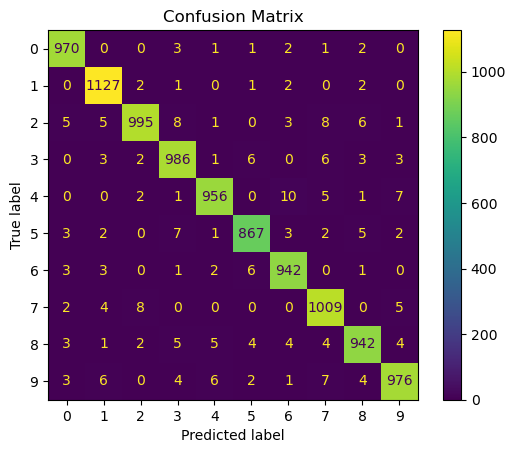

In [33]:
# Create ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
disp.plot()
plt.title('Confusion Matrix')
plt.show()


Text(0.5, 1.0, 'True label: 9, Predicted label: 1')

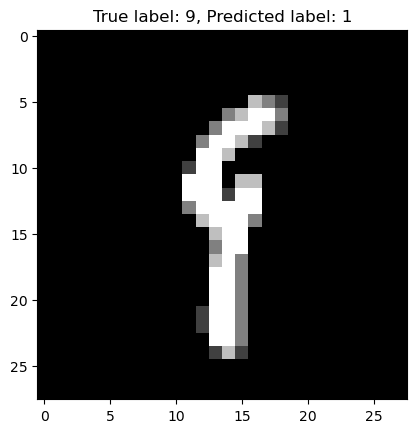

In [40]:
#let's get some samples of inaccurate predictions and see what's going on
#the np.where function returns the index where the given condition is true
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
#show the image using matplotlib
plt.imshow(x_test[i], cmap='gray')
#add title with the true label and the predicted label
plt.title('True label: %d, Predicted label: %d' % (y_test[i], p_test[i]))

It can be clearly seen that the misclassified images are often hard to properly classify even by a human